In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('polymer_10.dat',sep=' ')

In [0]:
df.shape

(1000, 6)

In [0]:
df.head()

,,,,,time,E_total/kT,E_kinetic/kT,E_potential/kT,Ree/sigma,Rg/sigma
1.0,NaN,78.8374,NaN,12.5772,NaN,66.2601,NaN,2.68848,NaN,1.53570
2.0,NaN,78.4065,NaN,13.7127,NaN,64.6938,NaN,2.14870,NaN,1.50403
3.0,NaN,77.8321,NaN,12.2350,NaN,65.5971,NaN,1.94117,NaN,1.40900
4.0,NaN,74.7164,NaN,13.3402,NaN,61.3762,NaN,1.93441,NaN,1.50968
5.0,NaN,77.0060,NaN,15.0419,NaN,61.9641,NaN,2.07340,NaN,1.51677


In [0]:
df=pd.read_csv('polymer_10-Copy.dat',sep='  ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
df.shape

(1000, 6)

In [0]:
df

,time,E_total/kT,E_kinetic/kT,E_potential/kT,Ree/sigma,Rg/sigma
0,1.0,78.8374,12.5772,66.2601,2.68848,1.53570
1,2.0,78.4065,13.7127,64.6938,2.14870,1.50403
2,3.0,77.8321,12.2350,65.5971,1.94117,1.40900
3,4.0,74.7164,13.3402,61.3762,1.93441,1.50968
4,5.0,77.0060,15.0419,61.9641,2.07340,1.51677
...,...,...,...,...,...,...
995,996.0,84.9547,13.0561,71.8986,2.85014,1.69316
996,997.0,83.0286,16.6986,66.3300,2.53444,1.23799
997,998.0,81.3820,14.0292,67.3528,3.71798,1.42584
998,999.0,86.4428,15.4168,71.0261,4.96206,1.80430


## Differential Equations

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### SIR Model

In [0]:
def model(y,t):
  k=0.3
  dydt=-k*y
  return dydt

In [0]:
y0=5
t=np.linspace(0,20,10)
y=odeint(model,y0,t)

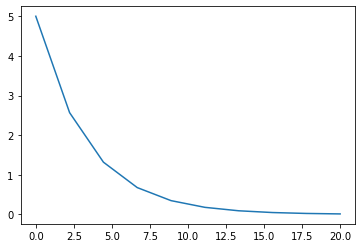

In [0]:
plt.plot(t,y)

In [0]:
def model(y,t,R0):
  S=y[0]
  I=y[1]
  R=y[2]
 
  dSdt=-1*R0*S*I
  dIdt=R0*S*I-I
  dRdt=I

  return [dSdt,dIdt,dRdt]

In [0]:
R0=2
y0=[99999/100000,1/100000,0]

t=np.linspace(0,25)
sol=odeint(model,y0,t,args=(R0,))

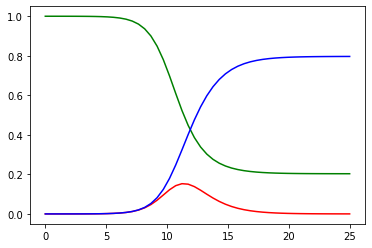

In [0]:
plt.plot(t,sol[:,0],'g')
plt.plot(t,sol[:,1],'r')
plt.plot(t,sol[:,2],'b')

In [0]:
def getR0(S_inf):
  return np.log(S_inf)/(S_inf-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


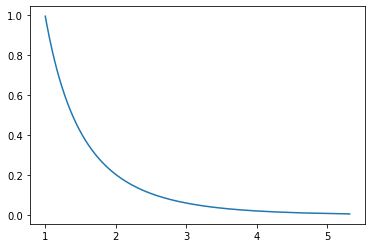

In [0]:
S_inf=np.linspace(0,1,200)
R0=getR0(S_inf)

plt.plot(R0,S_inf)

### SEIR Model

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### SEIR Equations

In [0]:
def model(y,t,F,beta0,alpha,k,mu,sigma,gamma,d,lambda_):
  S=y[0]
  E=y[1]
  I=y[2]
  R=y[3]
  N=y[4]
  D=y[5]
  C=y[6]

  beta_t=beta0*(1-alpha)*((1-D/N)**k)
  dSdt=-beta0*S*F/N-beta_t*S*I/N-mu*S
  dEdt=beta0*S*F/N+beta_t*S*I/N-(sigma+mu)*E
  dIdt=sigma*E-(gamma+mu)*I
  dRdt=gamma*I-mu*R
  dNdt=-mu*N
  dDdt=d*gamma*I-lambda_*D
  dCdt=sigma*E

  return [dSdt,dEdt,dIdt,dRdt,dNdt,dDdt,dCdt]

#### 1

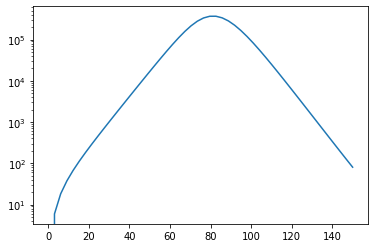

In [0]:
N0=14.0e6

S0=0.9*N0
E0=1.0 #
I0=0.0 #
R0=0.0 #
N0=N0
D0=0.0 #
C0=1.0 #

F=10
beta0=0.5944
alpha=0
k=0
mu=0.0205
sigma=1.0/3
gamma=1.0/5
d=0
lambda_=1/11.2

y0=[S0,E0,I0,R0,N0,D0,C0]

t=np.linspace(0,150)
sol=odeint(model,y0,t,args=(F,beta0,alpha,k,mu,sigma,gamma,d,lambda_))
plt.plot(t,sol[:,2])
plt.yscale('log')

#### 2

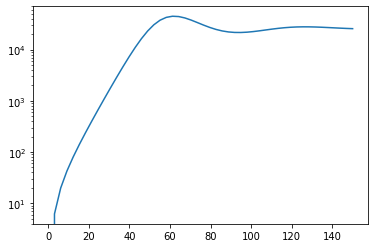

In [0]:
N0=14.0e6

S0=0.9*N0
E0=1.0 #
I0=0.0 #
R0=0.0 #
N0=N0
D0=0.0 #
C0=1.0 #

F=10
beta0=0.5944
alpha=0
k=1117.3
mu=0
sigma=1.0/3
gamma=1.0/5
d=0.2
lambda_=1/11.2

y0=[S0,E0,I0,R0,N0,D0,C0]

t=np.linspace(0,150)
sol=odeint(model,y0,t,args=(F,beta0,alpha,k,mu,sigma,gamma,d,lambda_))
plt.plot(t,sol[:,2])
plt.yscale('log')

#### 3

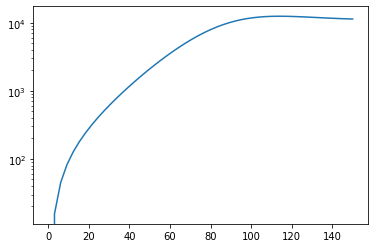

In [0]:
N0=14.0e6

S0=0.9*N0
E0=1.0 #
I0=0.0 #
R0=0.0 #
N0=N0
D0=0.0 #
C0=1.0 #


F=10.0
beta0=1.68
alpha=0.8
k=1117.3
mu=0
sigma=1.0/3
gamma=1.0/5
d=0.2
lambda_=1/11.2

y0=[S0,E0,I0,R0,N0,D0,C0]

t=np.linspace(0,150)
sol=odeint(model,y0,t,args=(F,beta0,alpha,k,mu,sigma,gamma,d,lambda_))
plt.plot(t,sol[:,2])
#plt.plot(t,sol[:,3])
plt.yscale('log')
#plt.xscale('log')

###  time varying parameters 

In [0]:
def model2(y,t,k,sigma,gamma,d,lambda_):
  S=y[0]
  E=y[1]
  I=y[2]
  R=y[3]
  N=y[4]
  D=y[5]
  C=y[6]

  if t<=10:
    F=10
    beta0=0.5944
    alpha=0
    mu=0.0205
  elif t<=40:
    F=0
    beta0=1.68
    alpha=0.4239
    mu=0
  else:
    F=0
    beta0=0.5944
    alpha=0.8478
    mu=0

  beta_t=beta0*(1-alpha)*((1-D/N)**k)
  dSdt=-beta0*S*F/N-beta_t*S*I/N-mu*S
  dEdt=beta0*S*F/N+beta_t*S*I/N-(sigma+mu)*E
  dIdt=sigma*E-(gamma+mu)*I
  dRdt=gamma*I-mu*R
  dNdt=-mu*N
  dDdt=d*gamma*I-lambda_*D
  dCdt=sigma*E

  return [dSdt,dEdt,dIdt,dRdt,dNdt,dDdt,dCdt]

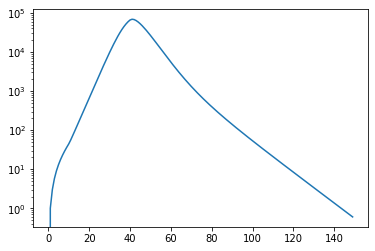

In [0]:
N0=14.0e6

S0=0.9*N0
E0=1.0 #
I0=0.0 #
R0=0.0 #
N0=N0
D0=0.0 #
C0=1.0 #


#F=10.0
#beta0=1.68
#alpha=0.8
k=1117.3
#mu=0
sigma=1.0/3
gamma=1.0/5
d=0.2
lambda_=1/11.2

y0=[S0,E0,I0,R0,N0,D0,C0]

t=range(150)
sol=odeint(model2,y0,t,args=(k,sigma,gamma,d,lambda_))
plt.plot(t[:],sol[:,2])
#plt.plot(t,sol[:,3])
plt.yscale('log')
#plt.xscale('log')

[1.00882695e+07 5.62177384e+04 5.87134468e+04 6.13562700e+04
 1.14050624e+07 8.75827869e+03 1.20075674e+05]


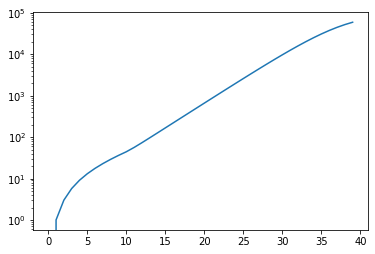

In [7]:
N0=14.0e6

S0=0.9*N0
E0=1.0 #
I0=0.0 #
R0=0.0 #
N0=N0
D0=0.0 #
C0=1.0 #


#F=10.0
#beta0=1.68
#alpha=0.8
k=1117.3
#mu=0
sigma=1.0/3
gamma=1.0/5
d=0.2
lambda_=1/11.2

y0=[S0,E0,I0,R0,N0,D0,C0]

t=range(40)
sol=odeint(model2,y0,t,args=(k,sigma,gamma,d,lambda_))
plt.plot(t[:40],sol[:40,2])
#plt.plot(t,sol[:,3])
plt.yscale('log')
#plt.xscale('log')
print(sol[-1])

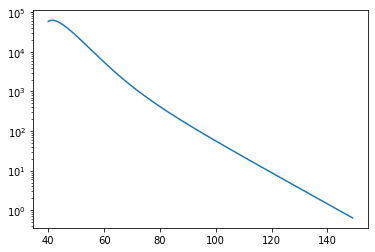

In [8]:
 N0=14.0e6

S0=0.9*N0
E0=1.0 #
I0=0.0 #
R0=0.0 #
N0=N0
D0=0.0 #
C0=1.0 #


#F=10.0
#beta0=1.68
#alpha=0.8
k=1117.3
#mu=0
sigma=1.0/3
gamma=1.0/5
d=0.2
lambda_=1/11.2

y0=[1.00882695e+07, 5.62177384e+04, 5.87134468e+04, 6.13562700e+04, 1.14050624e+07, 8.75827869e+03, 1.20075674e+05]
t=range(40,150)
sol=odeint(model2,y0,t,args=(k,sigma,gamma,d,lambda_))
plt.plot(t[:],sol[:,2])
#plt.plot(t,sol[:,3])
plt.yscale('log')
#plt.xscale('log')

# Indian Data

In [0]:
!cp kaggle.json /root/.kaggle
!chmod 600 /content/kaggle.json
%env KAGGLE_CONFIG_DIR=/content
!echo $KAGGLE_CONFIG_DIR

env: KAGGLE_CONFIG_DIR=/content
/content


In [0]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

  0% 0.00/55.4k [00:00<?, ?B/s]
100% 55.4k/55.4k [00:00<00:00, 21.2MB/s]


In [0]:
!unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: IndividualDetails.csv   
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('covid_19_india.csv')
print(df.shape)
print(df.columns)
df.tail()

(770, 9)
Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
765,766,08/04/20,9:00 AM,Telengana,-,-,35,7,364
766,767,08/04/20,9:00 AM,Tripura,-,-,0,0,1
767,768,08/04/20,9:00 AM,Uttarakhand,-,-,5,0,31
768,769,08/04/20,9:00 AM,Uttar Pradesh,-,-,21,3,326
769,770,08/04/20,9:00 AM,West Bengal,-,-,13,5,99


In [0]:
type(df.iloc[1,:]['Date'])

str

In [0]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [0]:
df.sort_values('Date')

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
740,741,2020-04-08,9:00 AM,Andaman and Nicobar Islands,-,-,0,0,10
739,740,2020-04-08,9:00 AM,Andhra Pradesh,-,-,1,4,305
768,769,2020-04-08,9:00 AM,Uttar Pradesh,-,-,21,3,326
753,754,2020-04-08,9:00 AM,Karnataka,-,-,25,4,175


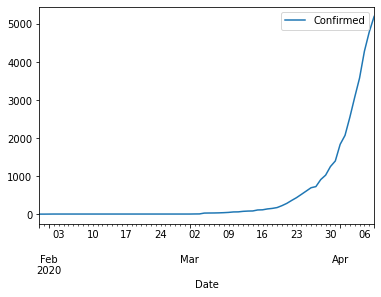

In [0]:
df.groupby(['Date']).sum().plot(y='Confirmed',use_index=True)

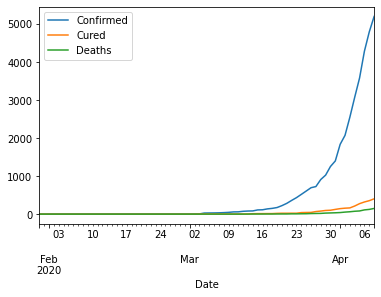

In [0]:
df.groupby(['Date']).sum().reset_index().plot(x='Date',y=['Confirmed','Cured','Deaths'])

# Monte Carlo

In [0]:
import numpy as np
import matplotlib.pyplot as plt

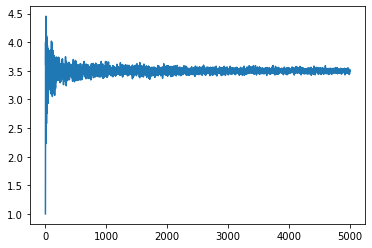

In [0]:
x=[]
y=[]
for n in range(1,5000):
  sum=0
  for j in range(n):
    dice_throw=np.random.randint(1,7)
    sum+=dice_throw
  avg_score=sum/n
  x.append(n)
  y.append(avg_score)
plt.plot(x,y)

(2.0, 5.0)

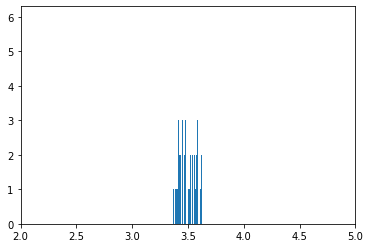

In [0]:
M=100
N=500

avg_score=[]
for m in range(M):
  sum=0
  for i in range(N):
    dice_throw=np.random.randint(1,7)
    sum+=dice_throw
  _avg_score=sum/N
  avg_score.append(_avg_score)
plt.hist(avg_score,bins=100);
plt.xlim(2,5)

## Free diffusion of a particle

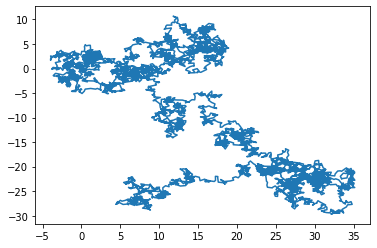

In [0]:
t0=0
x0=np.zeros(2)
dt=0.1
Tf=500

xt=x0
t=t0
total_steps=int(Tf/dt)
positions=np.empty([total_steps,2])
for step_i in range(1,total_steps):
  xt=xt+np.sqrt(dt)*np.random.normal(size=2)
  positions[step_i]=xt
  t=t+dt
plt.plot(positions[:,0],positions[:,1])